# Tutorial 2: Introduction to Reading Data

Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:

- define the following:
  - absolute file path
  - relative file path
  - url
- read data into R using a relative path and a url
- compare and contrast the following functions:
  - `read_csv`
  - `read_tsv`
  - `read_csv2`
  - `read_delim`
  - `read_excel`
- match the following `tidyverse` `read_*` function arguments to their descriptions:
  - `file`
  - `delim`
  - `col_names`
  - `skip`
- choose the appropriate `tidyverse` `read_*` function and function arguments to load a given plain text tabular data set into R
- use `readxl` library's `read_excel` function and arguments to load a sheet from an excel file into R
- connect to a database using the `DBI` library's `dbConnect` function
- list the tables in a database using the `DBI` library's `dbListTables `function
- create a reference to a database table that is queriable using the `tbl` from the `dbplyr` library
- retrieve data from a database query and bring it into R using the `collect` function from the `dbplyr` library
- use `write_csv` to save a data frame to a csv file
- _optional:_ scrape data from the web
  - read/scrape data from an internet URL using the `rvest` `html_nodes` and `html_text` functions
  - compare downloading tabular data from a plain text file (e.g. `*.csv`) from the web versus scraping data from a `.html` file

Any place you see `...`, you must fill in the function, variable, or data to complete the code. Replace `fail()` with your completed code and run the cell!

In [3]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
options(repr.matrix.max.rows = 6)
source("tests.R")
source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




## 1. Happiness Report
As you might remember from `worksheet_02`, we practised loading data from the *Sustainable Development Solutions Network's* [World Happiness Report](http://worldhappiness.report/). That data was the output of their analysis that calculated each country's happiness score and how much each variable contributed to it. In this tutorial, we are going to look at the data at an earlier stage of the study - the aggregated/averaged values (per country and year) for many different social and health aspects that the researchers anticipated might contribute to happiness (Table2.1 from [this Excel spreadsheet](https://s3.amazonaws.com/happiness-report/2018/WHR2018Chapter2OnlineData.xls)).

The goal for today is to produce a plot of 2017's positive affect scores against healthy life expectancy at birth, with healthy life expectancy at birth on the x-axis and positive affect on the y-axis. For this study, positive affect was defined as the average of three positive affect measures: happiness, laughter and enjoyment. We would also like to convert the **positive affect score** from a scale of 0 - 1 to a scale from 0 - 10.

1. use `filter` to subset the rows where the year is equal to 2017
2. use `mutate` to convert the "Positive affect" score from a scale of 0 - 1 to a scale from 0 - 10
3. use `select` to choose the "Healthy life expectancy at birth" column and the scaled "Positive affect" column
4. use `ggplot` to create our plot of "Healthy life expectancy at birth" (x - axis) and scaled "Positive affect" (y - axis)

**Tips for success:** Try going through all of the steps on your own, but don't forget to discuss with others (classmates, TAs, or an instructor) if you get stuck. If something is wrong and you can't spot the issue, be sure to **read the error message carefully**. Since there are a lot of steps involved in working with data and modifying it, feel free to look back at `worksheet_02`. 

**Question 1.1** Multiple Choice: 
<br> {points: 1}

What is the maximum value for the "Positive affect" score (in the original data file that you read into R)?

A. 100

B. 10 

C. 1

D. 0.1

E. 5

*Assign your answer to an object called `answer1.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [2]:
# Replace the fail() with your answer. 
answer1.1 <- "C"
# your code here
 # No Answer - remove if you provide an answer

In [3]:
test_1.1()

Test passed 😀
[1] "Success!"


**Question 1.2** Multiple Choice: 
<br> {points: 1}

Which column's values will be used to filter the data?

A. `countries`

B. `generosity`

C. `positive affect`

D. `year`

*Assign your answer to an object called `answer1.2`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [6]:
# Replace the fail() with your answer. 
answer1.2 <- "D"
# your code here
 # No Answer - remove if you provide an answer

In [7]:
test_1.2()

Test passed 😸
[1] "Success!"


**Question 1.3.0**
<br> {points: 1}

Use the appropriate `read_*` function to read in the `WHR2018Chapter2OnlineData` (look in the `tutorial_02` directory to ensure you use the correct relative path to read it in).

_Assign the data frame to an object called `happy_df_csv`._

In [6]:
# your code here
happy_df_csv <- read_csv(file="data/WHR2018Chapter2OnlineData.csv") # No Answer - remove if you provide an answer
happy_df_csv

Rows: 1562 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): country
dbl (18): year, Life Ladder, Log GDP per capita, Social support, Healthy lif...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2008,3.723590,7.168690,0.4506623,49.20966,0.7181143,0.1818195,0.8816863,0.5176372,0.2581955,0.6120721,-1.929690,-1.655084,1.774662,0.4765997,NA,NA,NA
Afghanistan,2009,4.401778,7.333790,0.5523084,49.62443,0.6788964,0.2036145,0.8500354,0.5839256,0.2370924,0.6115452,-2.044093,-1.635025,1.722688,0.3913617,NA,NA,0.4419058
Afghanistan,2010,4.758381,7.386629,0.5390752,50.00896,0.6001272,0.1376302,0.7067661,0.6182654,0.2753238,0.2993574,-1.991810,-1.617176,1.878622,0.3948027,NA,NA,0.3273182
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Zimbabwe,2015,3.703191,7.556052,0.7358003,50.92565,0.6671933,-0.09458464,0.8104573,0.7150788,0.1788611,0.5900124,-0.8930776,-1.357514,2.198865,0.5937758,NA,0.432,0.6551373
Zimbabwe,2016,3.735400,7.538829,0.7684254,51.80007,0.7329715,-0.06528313,0.7236120,0.7376359,0.2085549,0.6993440,-0.8630440,-1.371214,2.776363,0.7432572,NA,0.432,0.5966902
Zimbabwe,2017,3.638300,7.538187,0.7541471,52.67448,0.7528261,-0.06600469,0.7512080,0.8064284,0.2240513,0.6826467,NA,NA,2.656848,0.7302443,NA,0.432,0.5814838


In [7]:
test_1.3.0()

Test passed 🥇
Test passed 🎉
Test passed 🌈
[1] "Success!"


**Question 1.3.1**
<br> {points: 1}

Above, you loaded the data from a file we already downloaded and converted to a `.csv` for you. But you can also use the `readxl` R package to directly load in Excel files into R. Given that the data we loaded above (`WHR2018Chapter2OnlineData.csv`) was originally sourced from an Excel file on the web, let's now directly read that Excel file into R using the `read_excel` function from that package. This Excel file has multiple sheets, the data we want is on the first one.

> **Note:**
> `read_excel` does not support putting a URL as the file path argument. So we need to first download the file and write it to disk using R's `download.file` function, and then we can read that saved Excel file into R using `read_excel`.

To answer the question, fill in the blanks in the code below. If you are unsure, try reading the documentation for the new functions and ask others for help!

Assign the data into an object called `happy_df`.

In [11]:
library(readxl)
url <- "https://s3.amazonaws.com/happiness-report/2018/WHR2018Chapter2OnlineData.xls"

# download.file(..., destfile = "data/WHR2018Chapter2OnlineData.xls")
#... <- read_excel(path = ..., sheet = ...)
download.file(url,destfile = "data/WHR2018Chapter2OnlineData.xls")
happy_df <- read_excel(path="data/WHR2018Chapter2OnlineData.xls",sheet=1)
# your code here
 # No Answer - remove if you provide an answer
happy_df

country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2008,3.723590,7.168690,0.4506623,49.20966,0.7181143,0.1818195,0.8816863,0.5176372,0.2581955,0.6120721,-1.929690,-1.655084,1.774662,0.4765997,NA,NA,NA
Afghanistan,2009,4.401778,7.333790,0.5523084,49.62443,0.6788964,0.2036145,0.8500354,0.5839256,0.2370924,0.6115452,-2.044093,-1.635025,1.722688,0.3913617,NA,NA,0.4419058
Afghanistan,2010,4.758381,7.386629,0.5390752,50.00896,0.6001272,0.1376302,0.7067661,0.6182655,0.2753238,0.2993574,-1.991810,-1.617176,1.878622,0.3948027,NA,NA,0.3273182
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Zimbabwe,2015,3.703191,7.556052,0.7358003,50.92565,0.6671933,-0.09458464,0.8104573,0.7150788,0.1788611,0.5900124,-0.8930776,-1.357514,2.198865,0.5937758,NA,0.432,0.6551373
Zimbabwe,2016,3.735400,7.538829,0.7684254,51.80007,0.7329715,-0.06528313,0.7236120,0.7376359,0.2085549,0.6993440,-0.8630440,-1.371214,2.776363,0.7432572,NA,0.432,0.5966902
Zimbabwe,2017,3.638300,7.538187,0.7541471,52.67448,0.7528261,-0.06600469,0.7512080,0.8064284,0.2240513,0.6826467,NA,NA,2.656848,0.7302443,NA,0.432,0.5814838


In [12]:
test_1.3.1()

Test passed 🥳
Test passed 😀
Test passed 😀
[1] "Success!"


Look at the column names - they contain spaces!!! This is not a best practice and will make it difficult to use our tidyverse functions... Run the cell below to use the `make.names` function that will replace all the spaces with a `.` so we don't have this problem. The `colnames` function is also needed to access the data frame's column names.

In [13]:
### Run this cell before continuing. 
colnames(happy_df) <- make.names(colnames(happy_df))
happy_df

country,year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,Positive.affect,Negative.affect,Confidence.in.national.government,Democratic.Quality,Delivery.Quality,Standard.deviation.of.ladder.by.country.year,Standard.deviation.Mean.of.ladder.by.country.year,GINI.index..World.Bank.estimate.,GINI.index..World.Bank.estimate...average.2000.15,gini.of.household.income.reported.in.Gallup..by.wp5.year
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2008,3.723590,7.168690,0.4506623,49.20966,0.7181143,0.1818195,0.8816863,0.5176372,0.2581955,0.6120721,-1.929690,-1.655084,1.774662,0.4765997,NA,NA,NA
Afghanistan,2009,4.401778,7.333790,0.5523084,49.62443,0.6788964,0.2036145,0.8500354,0.5839256,0.2370924,0.6115452,-2.044093,-1.635025,1.722688,0.3913617,NA,NA,0.4419058
Afghanistan,2010,4.758381,7.386629,0.5390752,50.00896,0.6001272,0.1376302,0.7067661,0.6182655,0.2753238,0.2993574,-1.991810,-1.617176,1.878622,0.3948027,NA,NA,0.3273182
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Zimbabwe,2015,3.703191,7.556052,0.7358003,50.92565,0.6671933,-0.09458464,0.8104573,0.7150788,0.1788611,0.5900124,-0.8930776,-1.357514,2.198865,0.5937758,NA,0.432,0.6551373
Zimbabwe,2016,3.735400,7.538829,0.7684254,51.80007,0.7329715,-0.06528313,0.7236120,0.7376359,0.2085549,0.6993440,-0.8630440,-1.371214,2.776363,0.7432572,NA,0.432,0.5966902
Zimbabwe,2017,3.638300,7.538187,0.7541471,52.67448,0.7528261,-0.06600469,0.7512080,0.8064284,0.2240513,0.6826467,NA,NA,2.656848,0.7302443,NA,0.432,0.5814838


**Question 1.3.2**
<br> {points: 1}

Using the scaffolding given in the cell below, `filter`, `mutate`, and `select` the `happy_df` data frame as needed to get it ready to create our desired scatterplot. Recall that we wanted to rescale the "Positive affect" scores so that they fall in the range 0-10 instead of 0-1. Call the new, re-scaled column `Positive.affect.scaled`.

_Assign the data frame containing only the columns we need to create our plot to an object called `reduced_happy_df`._

In [15]:
# happy_step1 <- ...(happy_df, year == ...)
# happy_step2 <- mutate(happy_step1, Positive.affect.scaled = ...)
# reduced_happy_df <- ...(happy_step2, ..., ...)
happy_step1 <- filter(happy_df,year=='2017')
happy_step2 <- mutate(happy_step1, Positive.affect.scaled = Positive.affect*10)
reduced_happy_df <- select(happy_step2, Positive.affect.scaled,Healthy.life.expectancy.at.birth)
# your code here
# No Answer - remove if you provide an answer
reduced_happy_df

Positive.affect.scaled,Healthy.life.expectancy.at.birth
<dbl>,<dbl>
4.963486,52.33953
6.692409,69.05166
6.419796,65.69919
⋮,⋮
4.551819,54.98103
6.846233,53.80378
8.064284,52.67448


In [16]:
test_1.3.2()

Test passed 🎉
Test passed 🥳
Test passed 🎊
Test passed 🥳
Test passed 😀
Test passed 🥇
[1] "Success!"


**Question 1.4** 
<br> {points: 1}

Using the modified data set, `reduced_happy_df`, generate the scatterplot described above and make sure to label the axes in proper written English.

_Assign your plot to an object called `happy_plot`._

Warning message:
“Removed 1 rows containing missing values (geom_point).”


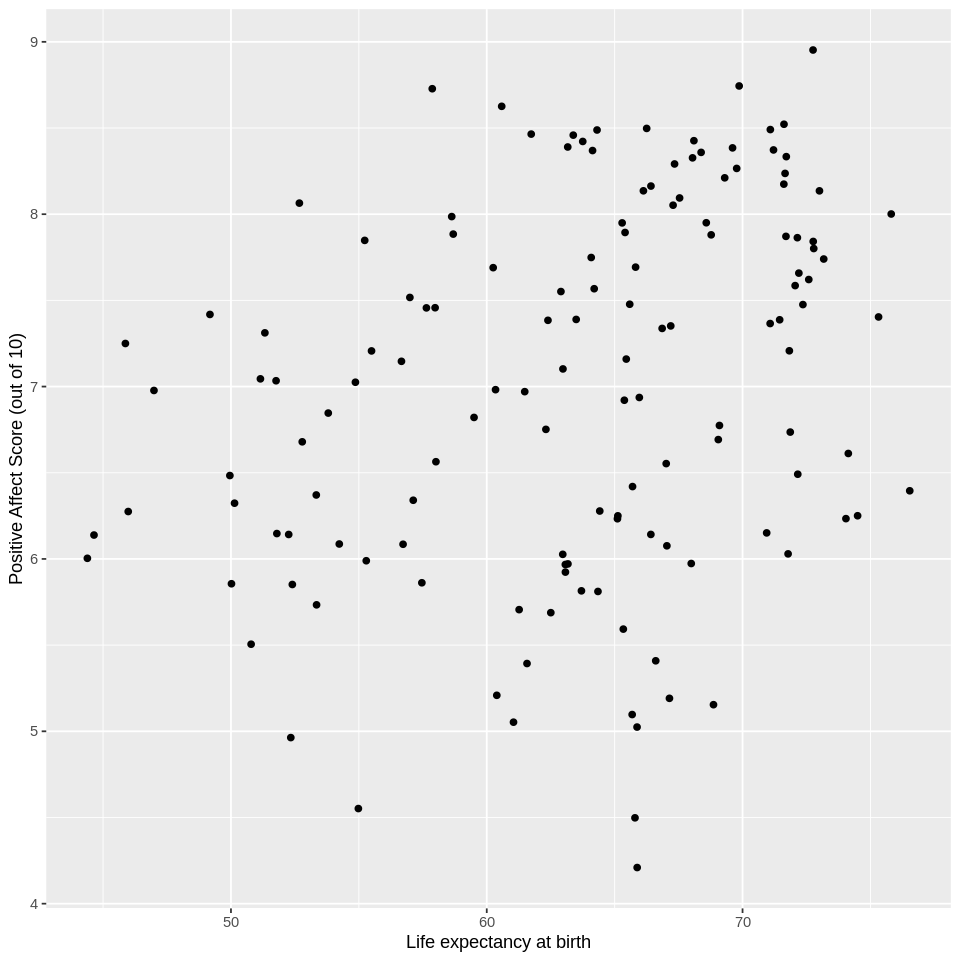

In [18]:
options(repr.plot.width = 8, repr.plot.height = 8)

#... <- ggplot(reduced_happy_df, ...(x = ..., y = ...)) + 
#     geom_...() + 
#     ...("...") + 
#     ylab("Positive affect score (out of ...)")
happy_plot <- ggplot(reduced_happy_df, aes(x=Healthy.life.expectancy.at.birth,y=Positive.affect.scaled))+geom_point()+xlab("Life expectancy at birth") +ylab("Positive Affect Score (out of 10)")
# your code here
 # No Answer - remove if you provide an answer
happy_plot

In [20]:
test_1.4()

Test passed 😀
Test passed 😀
Test passed 🎊
Test passed 🌈
Test passed 🥳
[1] "Success!"


**Question 1.5** 
<br> {points: 3}

In one sentence or two, describe what you see in the scatterplot above. Does there appear to be a relationship between life expectancy at birth and postive affect? If so, describe it.

There is a positvie relationship between life expectancy at birth and positive affect. As the life expectancy increases so does the positive affect.

**Question 1.6** 
<br> {points: 3}

Choose any variable (column) in the data set `happy_df` other than `Positive.affect` to plot against healthy life expectancy at birth. **You should NOT scale whichever variable you choose.** Ensure that healthy life expectancy at birth is on the x-axis and that you give your axes human-readable labels.

_Assign your plot to an object called `happy_plot_2`._

Warning message:
“Removed 80 rows containing missing values (geom_point).”


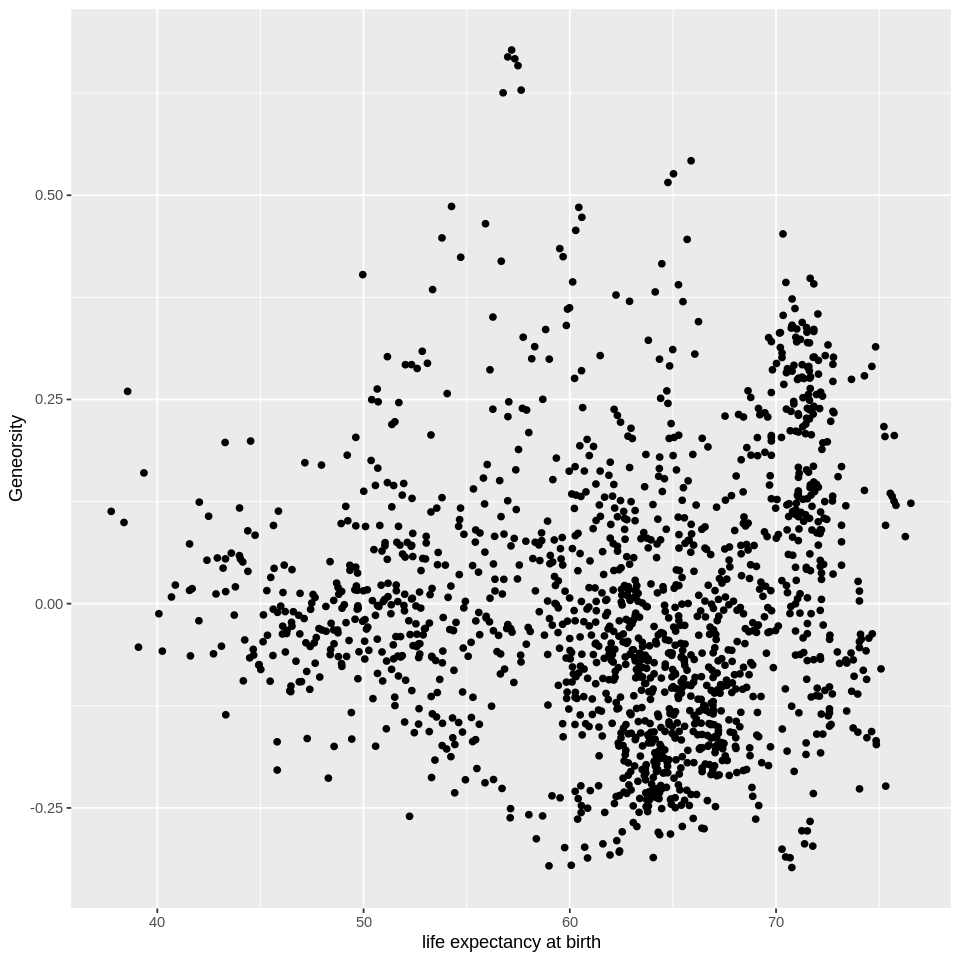

In [25]:
# your code here
happy_plot_2 <- ggplot(happy_df,aes(x=Healthy.life.expectancy.at.birth,y=Generosity))+geom_point()+xlab("life expectancy at birth")+ylab("Geneorsity")
# No Answer - remove if you provide an answer
happy_plot_2

In [26]:
# Here we check whether you have the correct object name(s). However,
# all other tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.
test_that("Did not create an object named happy_plot_2", {
    expect_true(exists("happy_plot_2")) 
})

Test passed 🥳


**Question 1.7**
<br> {points: 3}

In a sentence or two, describe what you see in the scatterplot above. Does there appear to be a relationship between healthy life expectancy at birth and the other variable you plotted? If so, describe it.

There does not seem to be a relationship between the geneorsity of a country and it's life expectancy at birth.

## 2. Whistler Snow

Skiing and snowboarding are huge in British Columbia. Some of the best slopes for snow sports are quite close. In fact, the famous mountain-bearing city of Whistler is just two hours north of Vancouver. With cold weather and plenty of snowfall, Whistler is an ideal destination for winter sports fanatics. 

One thing skiers and snowboarders want is fresh snow! When are they most likely to find this? In the `data` directory, we have two-year-long data sets from [Environment Canada from the Whistler Roundhouse Station](http://climate.weather.gc.ca/historical_data/search_historic_data_stations_e.html?StationID=348&Year=2007&Month=3&Day=1&timeframe=2&type=bar&MeasTypeID=snow&searchType=stnProx&txtRadius=25&optProxType=navLink&txtLatDecDeg=50.128889166667&txtLongDecDeg=122.95483333333&optLimit=specDate&selRowPerPage=25&station=WHISTLER) (on Whistler mountain). This weather station is located 1,835 m above sea level.

To answer the question of "When are skiers and snowboarders most likely to find fresh snow at Whistler?" you will create a line plot with the date is on the x-axis and the total snow per day in centimetres (the column named `Total Snow cm` in the data file) on the y-axis. Given that we have data for two years (2017 & 2018), we will create one plot for each year to see if there is a trend we can observe across the two years.

**Question 2.1** Multiple Choice: 
<br> {points: 1}

What are we going to plot on the y-axis?

A. total precipitation per day in centimetres

B. total snow on the ground in centimetres

C. total snow per day in centimetres

D. total rain per day in centimetres

*Assign your answer to an object called `answer2.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [27]:
# Replace the fail() with your answer. 
answer2.1 <- "C"
# your code here
 # No Answer - remove if you provide an answer

In [28]:
test_2.1()

Test passed 🎉
[1] "Success!"


**Question 2.2.0** 
<br> {points: 1}

Read in the file named `eng-daily-01012018-12312018.csv` from the `data` directory. **Make sure you preview the file to choose the correct `read_*` function and argument values to get the data into R.** 

_Assign your data frame to an object called `whistler_2018`._

*Note: You'll see a lot of entries of the form `NA`. This is the symbol R uses to denote missing data. Interestingly, you can do math and make comparisons with `NA`: for example,* `NA + 1 = NA`, `NA * 3 = NA`, `NA > 3 = NA`. *Most operations on `NA` return `NA`. This may seem a bit weird, but it makes things much simpler in R since it removes the need to write any special code to handle missing data!*

In [30]:
# your code here
whistler_2018 <- read_csv("data/eng-daily-01012018-12312018.csv",skip=25)
# No Answer - remove if you provide an answer
whistler_2018

Rows: 365 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): Month, Day, Data Quality
dbl  (10): Year, Max Temp (°C), Min Temp (°C), Mean Temp (°C), Heat Deg Days...
lgl  (13): Max Temp Flag, Min Temp Flag, Mean Temp Flag, Heat Deg Days Flag,...
date  (1): Date/Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),⋯,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
<date>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,⋯,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
2018-01-01,2018,01,01,†,6.0,NA,-6,NA,0.0,⋯,0,NA,0,NA,187,NA,NA,NA,NA,NA
2018-01-02,2018,01,02,†,5.5,NA,0,NA,2.8,⋯,0,NA,0,NA,183,NA,NA,NA,NA,NA
2018-01-03,2018,01,03,†,6.0,NA,0,NA,3.0,⋯,0,NA,0,NA,180,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2018-12-29,2018,12,29,†,0.0,NA,-3,NA,-1.5,⋯,9,NA,9,NA,206,NA,NA,NA,NA,NA
2018-12-30,2018,12,30,†,-5.5,NA,-8,NA,-6.8,⋯,0,NA,0,NA,205,NA,NA,NA,NA,NA
2018-12-31,2018,12,31,†,-2.0,NA,-12,NA,-7.0,⋯,1,NA,1,NA,198,NA,NA,NA,NA,NA


In [31]:
test_2.2.0()

Test passed 🥇
Test passed 🌈
Test passed 😸
Test passed 🥳
[1] "Success!"


**Question 2.2.1** 
<br> {points: 1}

Looking at the column names of the `whistler_2018` data frame, you can see we have white space in our column names again. Use `make.names` to remove the whitespace to make it easier to use our `tidyverse` functions.

In [38]:
# your code here
 # No Answer - remove if you provide an answer
colnames(whistler_2018) <- make.names(colnames(whistler_2018))
colnames(whistler_2018)

[1] "Date.Time"                 "Year"                     
 [3] "Month"                     "Day"                      
 [5] "Data.Quality"              "Max.Temp...C."            
 [7] "Max.Temp.Flag"             "Min.Temp...C."            
 [9] "Min.Temp.Flag"             "Mean.Temp...C."           
[11] "Mean.Temp.Flag"            "Heat.Deg.Days...C."       
[13] "Heat.Deg.Days.Flag"        "Cool.Deg.Days...C."       
[15] "Cool.Deg.Days.Flag"        "Total.Rain..mm."          
[17] "Total.Rain.Flag"           "Total.Snow..cm."          
[19] "Total.Snow.Flag"           "Total.Precip..mm."        
[21] "Total.Precip.Flag"         "Snow.on.Grnd..cm."        
[23] "Snow.on.Grnd.Flag"         "Dir.of.Max.Gust..10s.deg."
[25] "Dir.of.Max.Gust.Flag"      "Spd.of.Max.Gust..km.h."   
[27] "Spd.of.Max.Gust.Flag"

In [34]:
test_2.2.1()

Test passed 🎊
Test passed 🎊
[1] "Success!"


**Question 2.3** 
<br> {points: 1}

Create a line plot with the date on the x-axis and the total snow per day (in cm) on the y-axis by filling in the `...` in the code below. Ensure you give your axes human-readable labels.

_Assign your plot to an object called `whistler_2018_plot`._

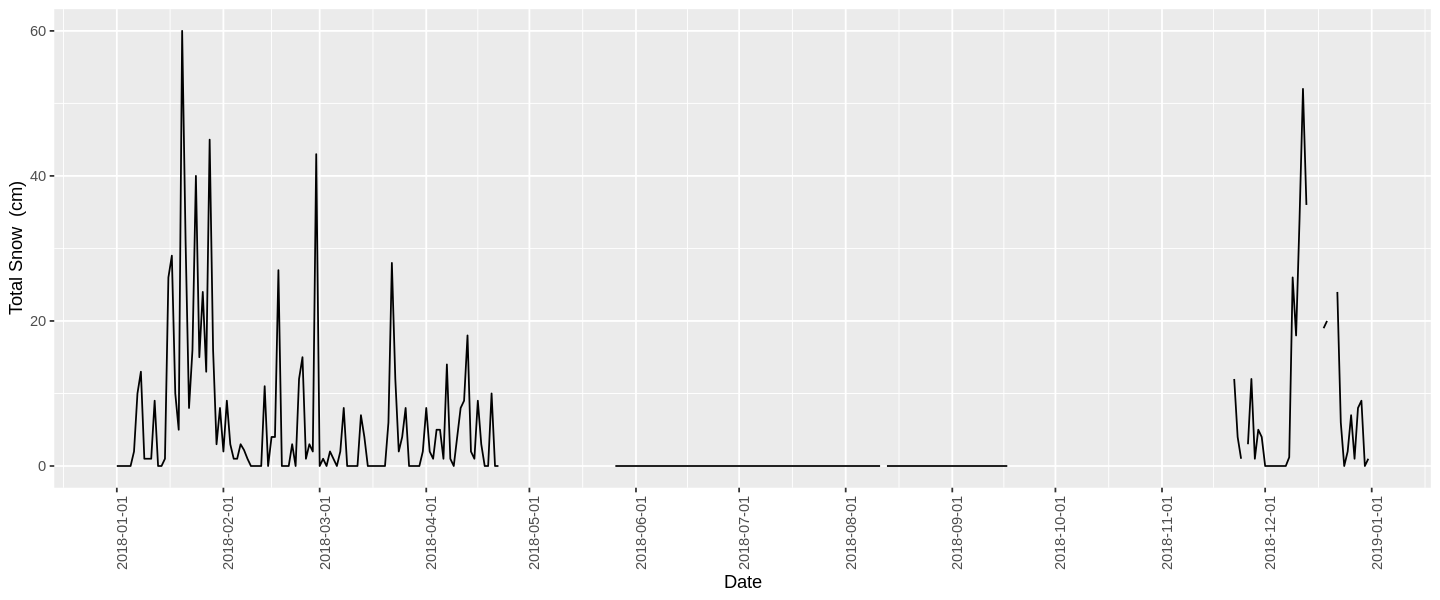

In [43]:
options(repr.plot.width = 12, repr.plot.height = 5)

whistler_2018_plot <- ggplot(whistler_2018, aes(x = Date.Time, y = Total.Snow..cm.)) + 
    geom_line() +
     xlab("Date") +
     ylab("Total Snow  (cm)") +
   scale_x_date(date_breaks = "1 month") + # labels every month
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) # rotates x axis labels to be vertical

# your code here
 # No Answer - remove if you provide an answer
whistler_2018_plot

In [44]:
test_2.3()

Test passed 🌈
Test passed 🌈
Test passed 🥳
Test passed 🥇
Test passed 🌈
[1] "Success!"


**Question 2.4** 
<br> {points: 3}

Looking at the line plot above, for 2018, of the months when it snowed, which 2 months had the **most** fresh snow?

January and December had the most snow

**Question 2.5**
<br> {points: 3}

Repeat the data loading and plot creation using the file `eng-daily-01012017-12312017.csv` located in the `data` directory to visualize the same data for the year 2017. 

_Assign your plot to an object called `whistler_2017_plot`._

Rows: 365 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (7): Month, Day, Data Quality, Max Temp Flag, Mean Temp Flag, Heat Deg...
dbl  (10): Year, Max Temp (°C), Min Temp (°C), Mean Temp (°C), Heat Deg Days...
lgl   (9): Min Temp Flag, Total Rain Flag, Total Snow Flag, Total Precip Fla...
date  (1): Date/Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


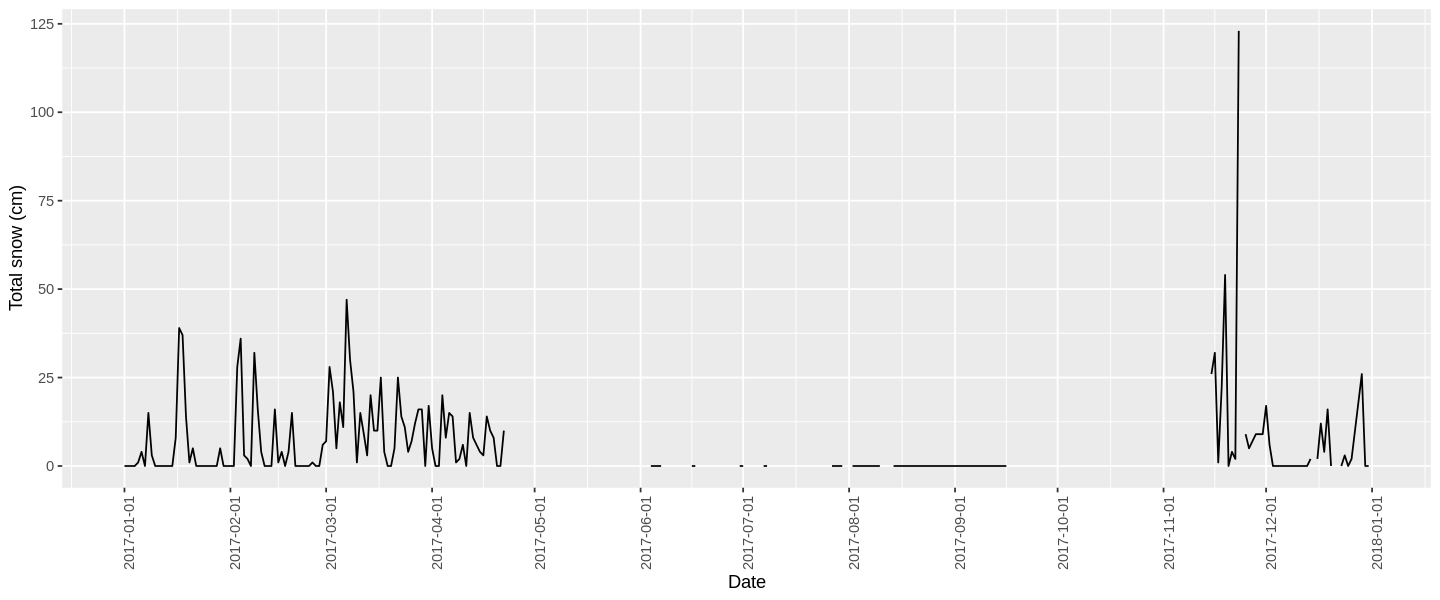

In [52]:
whistler_2017 <- read_csv("data/eng-daily-01012017-12312017.csv", skip = 24)
colnames(whistler_2017) <- make.names(colnames(whistler_2017))


whistler_2017_plot <- ggplot(whistler_2017, aes(x = Date.Time, y = Total.Snow..cm.)) + 
    geom_line() + 
    xlab("Date") + 
    ylab("Total snow (cm)") +
    scale_x_date(date_breaks = "1 month") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

whistler_2017_plot

In [53]:
# Here we check whether you have the correct object name(s). However,
# all other tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.
test_that("Did not create an object named whistler_2017_plot", {
    expect_true(exists("whistler_2017_plot")) 
})

Test passed 😸


**Question 2.6**
<br> {points: 3}

Looking at the line plot above, for 2017, of the months when it snowed, which 2 months had the **most** fresh snow?

November and March had the most snow.

**Question 2.7**
<br> {points: 3}

Are the months  with the most fresh snow the same in 2017 as they were in 2018? **Hint:** you might want to add a code cell where you plot the two plots right after each other so you can easily compare them in one screen view.

You can combine two plots, one atop the other, by using the `plot_grid` function from the `cowplot` package:

```
library(cowplot)
plot_grid(plot1, plot2, ncol = 1)
```
Is there any advantage of looking at 2 years worth of data? Why or why not?

Yes you can look at yearly trends to see if the amount of snow is consistent or if there is a trend with the amount of snow.

## 3. Reading from a Database

In `worksheet_02`, you'll recall that we opened a database stored in a `.db` file. This involved a lot more effort than just opening a `.csv`, `.tsv`, or any of the other plaintext / Excel formats. It was a bit of a pain to use a database in that setting since we had to use `dbplyr` to translate `tidyverse`-like commands (`filter`, `select`, etc.) into SQL commands that the database understands. We didn't run into this problem in the worksheet, but not _all_ `tidyverse` commands can currently be translated with SQLite databases. For example, with an SQLite database, we can compute a mean, but can't easily compute a median.

**Why should we bother with databases at all then?**

Databases become really useful in a large-scale setting:

- they enable storing large datasets across multiple computers with automatic redundancy and backups
- they enable multiple users to access them simultaneously and remotely without conflicts and errors 
- they provide mechanisms for ensuring data integrity and validating input
- they provide security to keep data safe

For example: there are around [4 billion](https://www.internetlivestats.com/google-search-statistics/) Google searches conducted daily as of 2019. Can you imagine if Google stored all of the data from those queries in a single `.csv` file!? Chaos would ensue. 

To reap the real benefits of databases, we'll need to move to a more fully-powered one: [PostgreSQL](https://www.postgresql.org/). We'll begin by loading the `DBI` and `dbplyr` packages that R uses to talk to databases, as well as the `RPostgres` package that provides the interface between these packages and PostgreSQL databases (note the similarity to the `RSQLite` package from `worksheet_02`).

In [54]:
### Run this cell before continuing. 
library(dbplyr)
library(DBI)
library(RPostgres)
library(lubridate) # This package is used to convert different time/date formats.


Attaching package: ‘dbplyr’


The following objects are masked from ‘package:dplyr’:

    ident, sql



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Investigating Trends in Crowdfunding

[Kickstarter](https://www.kickstarter.com/) is an online crowd-funding site where people can post projects they want to do, but don't have the financial resources required to fund the project on their own. Other users of Kickstarter can pledge money to the project (also called "backing" a project) to help the project become a reality. To persuade people to back a project, the project owner usually offers rewards to the "backers" for their help with funding, which they receive once funding reaches a particular amount.

In this section, we'll investigate how the amount of funding successful projects get has changed over time. We consider a project to be successful if the amount of funds pledged exceeded the goal.

**Question 3.0**
<br>{points: 1}

Databases are often stored *remotely* (i.e., not on your computer or on this JupyterHub). Your first task is to load the Kickstarter data from a PostgreSQL database stored remotely on the UBC statistics network.


URL: `"dsci-100-student.stat.ubc.ca"`

Port: `5432`

Username: `"dsci100"`

Password: `"dsci100"`

Database Name: `"kickstarter"`

Table Name: `"projects"`

We've provided the code to do this below. Replace each `...` with one of the 5 above items. 

*Note 1: Due to the UBC firewall, to get this to work you'll need to be connected to the UBC network or use the UBC VPN. For instructions on how to connect to UBC's VPN service, see [this webpage on UBC's IT website](https://it.ubc.ca/services/email-voice-internet/myvpn/setup-documents#setup).*

*Note 2: As this database will be used by the entire class, you will only have read access (no write permissions).*

*Assign the resulting database connection object to* `connection` *and the project table data to* `project_data`.

In [55]:
 connection <- dbConnect(RPostgres::Postgres(), dbname = "kickstarter",
                 host = "dsci-100-student.stat.ubc.ca", port = 5432,
          user = "dsci100", password = "dsci100")
 project_data <- tbl(connection, "projects")

# your code here
 # No Answer - remove if you provide an answer

In [56]:
test_3.0()

Test passed 😀
Test passed 🎊
Test passed 😸
[1] "Success!"


We can now use the `colnames` function to see what columns are available in the `project_data` table.

In [57]:
colnames(project_data)

[1] "id"                     "state"                  "url_project"           
 [4] "url_project_short"      "name"                   "country"               
 [7] "creator_id"             "location_id"            "category_id"           
[10] "created_at"             "deadline"               "launched_at"           
[13] "goal"                   "pledged"                "currency"              
[16] "currency_symbol"        "usd_pledged"            "static_usd_rate"       
[19] "backers_count"          "comments_count"         "updates_count"         
[22] "spotlight"              "staff_pick"             "blurb"                 
[25] "currency_trailing_code" "disable_communication"  "photo_url"             
[28] "profile_blurb"          "profile_id"             "profile_name"          
[31] "profile_project_id"     "profile_state"          "slug"                  
[34] "url_rewards"            "url_updates"            "video_id"              
[37] "video_url_high"         "video_url_webm"         "video_height"          
[40] "video_width"            "video_status"           "file_name"             
[43] "last_modification"      "deleted_comments"

**Question 3.1**
<br> {points: 1}

If we want to plot compare pledged and goal amounts of funding over time for successful projects in the United States, which columns should we `select` from the table?

A. `id`, `slug`, `pledged`

B. `pledged`, `goal`, `deadline`, `country`

C. `pledged`, `usd_pledged`, `location_id`

D. `currency`, `state`, `country`, `goal`

_Assign your answer to an object called `answer3.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`)._

In [60]:
# your code here
answer3.1 <- "B"
# No Answer - remove if you provide an answer

In [61]:
test_3.1()

Test passed 😸
[1] "Success!"


**Question 3.2**
<br> {points: 1}

Now we'll visualize the data. In order to do this, we need to take the correct subset of data from the table and use `ggplot` to plot the result. Note that we make the scatter plot slightly transparent (using `alpha = 0.01` in the code below) because there is so much data that it would otherwise be hard to see anything (*overplotting*).

In the below cell, you'll see some lines of code (currently commented out with `#` characters). **Remove the comments and rearrange these lines of code** to plot the ratio of pledged and goal funding as a function of project deadline date for all successful (where pledged funding is greater than goal funding) projects in the United States in the dataset.

*Note: there is a lot of data to plot here, so give it a moment to display!*

*Hint: you'll want to put all the dataframe manipulation functions first, and then the plotting functions afterward. Also note that some lines have a `+` at the end, meaning they're in the middle of the plotting code!*


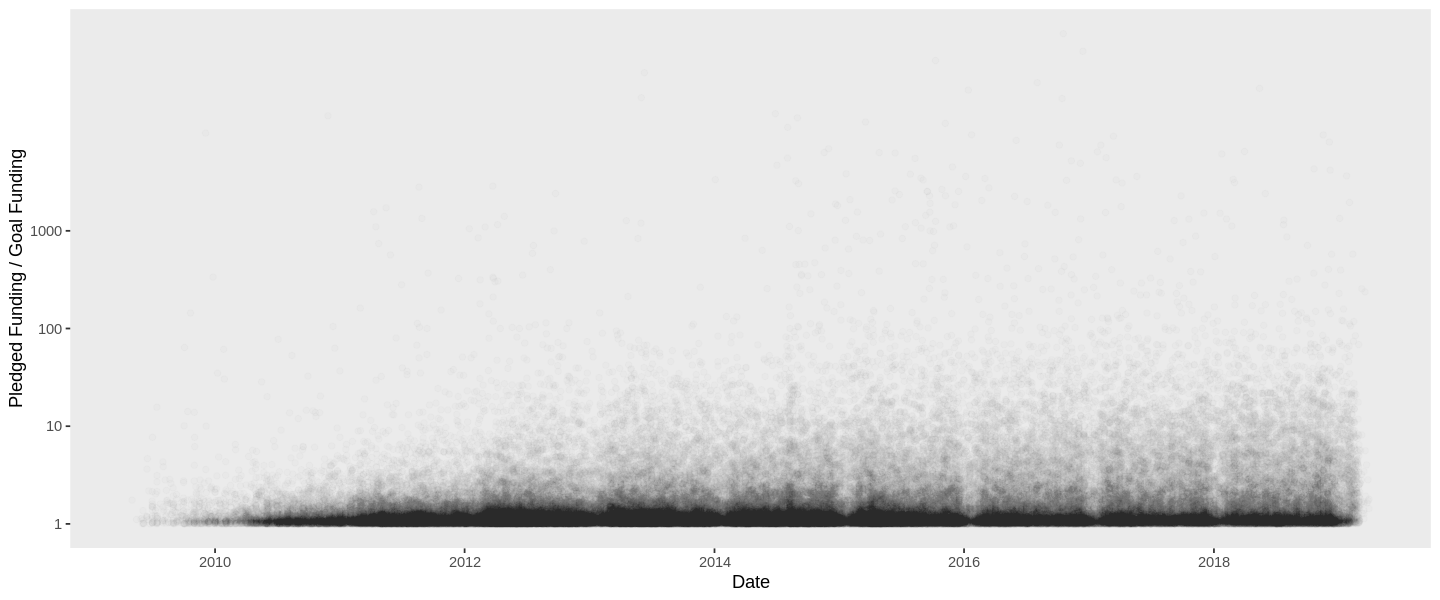

In [64]:
prj_unfiltered <- select(project_data, 'deadline', 'pledged', 'goal', 'country')   
prj <- filter(prj_unfiltered, pledged > goal & country == "US")
 funding_over_time_plot <- ggplot(prj, aes(x = as_datetime(deadline), y = pledged / goal)) +
geom_point(alpha = 0.01) +
   
     scale_y_continuous(trans = 'log10', breaks = c(1, 10, 100, 1000)) +

    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
  xlab('Date') +
     ylab('Pledged Funding / Goal Funding')

# your code here
funding_over_time_plot # No Answer - remove if you provide an answer

In [65]:
test_3.2()

Test passed 🥇
Test passed 😸
Test passed 😸
Test passed 😸
[1] "Success!"


**Question 3.3**
<br> {points: 3}

Is there a relationship between the ratio of pledged/goal funding and time? If so, describe it. 

Additionally, mention a pattern in the data or a characteristic of it that you may not have expected in advance.

There is a positive relationship, as time went on so did the pledged funding/goal funding. However the rate of increase during 2012-2016 seem to be less compared to 2010 - 2012.

**Question 3.4**
<br> {points: 1}

Finally, we'll save the project data to a local file in the `data/` folder called `project_data.csv`. Recall that we don't want to try to download and save the *entire dataset* (way too much data!) from the database, but only the `tbl` object named `prj`. So you will need to use the `collect` function followed by the appropriate `write_*` function.

*Assign the output of collect to an object called `project_df`*

In [67]:
# your code here
project_df <- collect(prj)
write_csv(project_df,"data/project_data.csv")
 # No Answer - remove if you provide an answer

In [68]:
test_3.4()

Test passed 🥳
Test passed 🎉
Test passed 😀
Test passed 😸
Test passed 🎊
[1] "Success!"


## 4 (Optional). Reading Data from the Internet

**Question 4.0**
<br> {points: 0}

More practice scraping! To keep ourselves out of legal hot water, we will get more practice scraping data using a website that was created for that purpose: http://books.toscrape.com/

Your task here is to scrape the prices of the science fiction novels on [this page](http://books.toscrape.com/catalogue/category/books/science-fiction_16/index.html) and determine the maximum, minimum and average price of science fiction novels at this bookstore. Tidy up and nicely present your results by creating a data frame called `sci_fi_stats` that has 2 columns, one called `stats` that contains the words `max`, `min` and `mean` and once called `value` that contains the calculated value for each of these.

The functions for maximum, minimum and average in R are listed in the table below:

| Calculation to perform | Function in R |
| ---------------------- | ------------- |
| maximum                | `max`         |
| minimum                | `min`         |
| average                | `mean`        |

Some other helpful hints:
- If you end up scraping some characters other than numbers you will have to use `str_replace_all` from the `stringr` library to remove them (similar to what we did with the commas in worksheet_02).
- Use `as.numeric` to convert your character type numbers to numeric type numbers before you pass them into the `max`, `min` and `mean` functions.
- If you have `NA` values in your objects that you need to pass into the `max`, `min` and `mean` functions, you will need to set the `na.rm` argument in these functions to `TRUE`.
- use the function `c` to create the vectors that will go in your data frame, for example, to create a vector with the values 10, 16 and 13 named ages, we would type: `ages <- c(10, 16, 13)`.
- use the function `tibble` to create the data frame from your vectors.

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
sci_fi_stats

**Question 4.1**
<br> {points: 0}

In `worksheet_02` you had practice scraping data from the web. Now that you have the skills, should you scrape that website you have been dreaming of harvesting data from? Maybe, maybe not... You should check the website's Terms of Service first and consider the application you have planned for the data after you scrape it.

List 3 websites you might be interested in scraping data from (for fun, profit, or research/education). List their URLs as part of your answer. For each website, search for their Terms of Service page. Take note if such a page exists, and if it does, provide the link to it and tell us whether or not they allow web scraping of their website.

You can list them in this cell! Double click to edit.

### Bonus/optional additional readings on legalities of web scraping:

Here are two recent news stories about web scraping and their legal implications:

- [D.C. Court: Accessing Public Information is Not a Computer Crime](https://www.eff.org/deeplinks/2018/04/dc-court-accessing-public-information-not-computer-crime)

- [Dear Canada: Accessing Publicly Available Information on the Internet Is Not a Crime](https://www.eff.org/deeplinks/2018/04/dear-canada-accessing-publicly-available-information-internet-not-crime)

In [ ]:
source("cleanup.R")